In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv("Dataset/Updated_Dataset.csv", encoding = 'latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97500 entries, 0 to 97499
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       97500 non-null  int64  
 1   Latitude_3                       97500 non-null  float64
 2   Longitude_3                      97500 non-null  float64
 3   Voltage_of_line_in_which__fire_  97500 non-null  object 
 4   Location_multiplier              97500 non-null  float64
 5   Danger_multiplier                97500 non-null  float64
 6   Product_of_multipliers           97500 non-null  float64
 7   COVER                            97500 non-null  float64
 8   HEIGHT                           97500 non-null  float64
 9   FOREST                           97500 non-null  float64
 10  Elevation                        97500 non-null  float64
 11  Monthly Mean Max Temperature     97500 non-null  float64
 12  Monthly Avg Rainfa

In [4]:
#random sampling
#Ratio 1:1(Negative:Positive)
random.seed(42)
sample_negatives_random= df.loc[df['Is_Fire'] == 0].sample(4875)
sample_positives_random= df.loc[df['Is_Fire'] == 1].sample(frac=1)
sample_random = pd.concat([sample_negatives_random,sample_positives_random])
sample_random = sample_random.sample(frac=1)

In [5]:
sample_random.drop([sample_random.columns[0]], axis = 1, inplace=True)
sample_random.drop([sample_random.columns[-1]], axis = 1, inplace=True)
sample_random = sample_random.reset_index()
df = sample_random.drop(['index'], axis = 1)

In [6]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encoded = onehotencoder.fit_transform(df.Voltage_of_line_in_which__fire_.values.reshape(-1,1)).toarray()
encoded = pd.DataFrame(encoded)
encoded.columns = ['Voltage_line_1','Voltage_line_2','Voltage_line_3','Voltage_line_4','Voltage_line_5','Voltage_line_6','Voltage_line_7','Voltage_line_8']
df = df.reset_index()
df = df.drop(['index'], axis = 1)
df = df.join(encoded)
df= df.drop(['Voltage_of_line_in_which__fire_'], axis=1)

In [7]:
df.dropna(inplace=True)

In [8]:
X = df.loc[:, df.columns != 'Is_Fire']
y = df.loc[:,df.columns == 'Is_Fire']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#Logistic Regression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7530769230769231

In [11]:
clf.score(X_train, y_train)

0.749423076923077

In [12]:
prediction=clf.predict_proba(X_test)

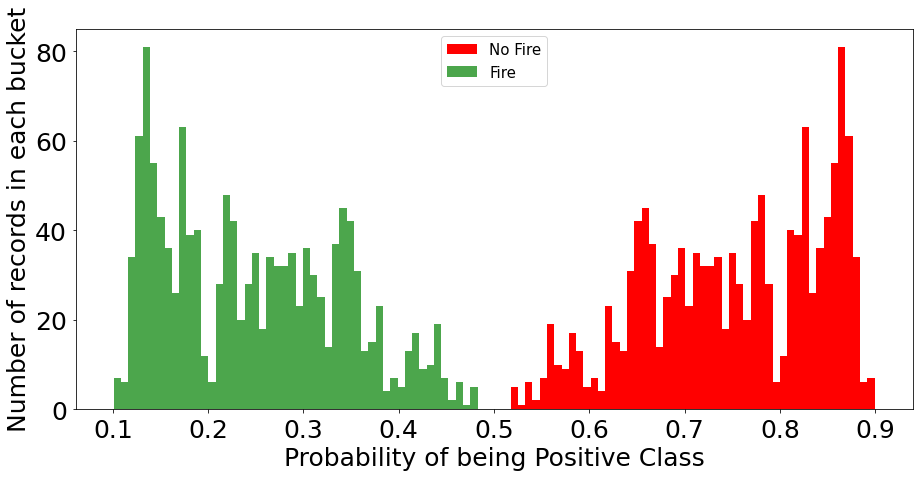

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.hist(prediction[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [14]:
#Naive Bayes
nb = BernoulliNB().fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)
accuracy_score(y_test, y_nb_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7523076923076923

In [15]:
nb.score(X_train, y_train)

0.7492307692307693

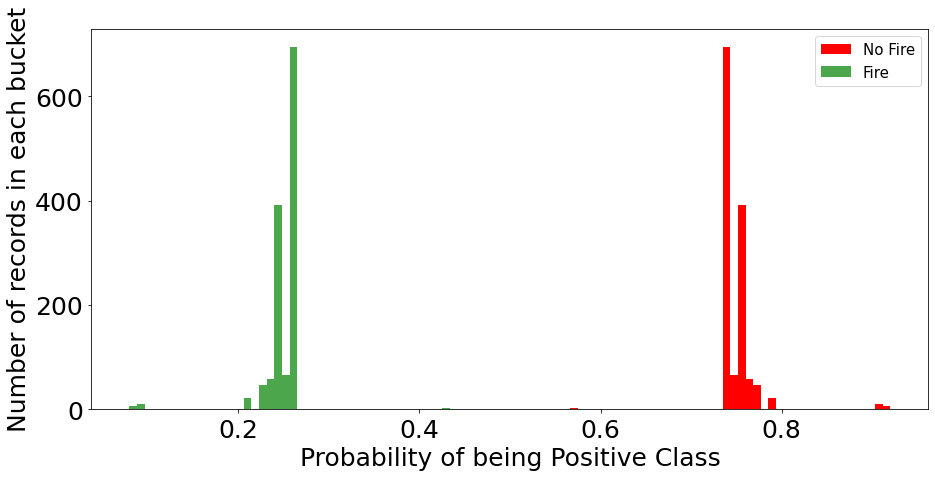

In [16]:
prediction_nb=nb.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_nb[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_nb[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [17]:
svm_clf = svm.SVC().fit(X_train, y_train)
y_svm_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_svm_pred)

C:\Users\monit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7530769230769231

In [18]:
svm_clf.score(X_train, y_train)

0.7492307692307693

In [19]:
print('Classification Report:\n',classification_report(y_test, y_svm_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_svm_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       979
         1.0       0.00      0.00      0.00       321

    accuracy                           0.75      1300
   macro avg       0.38      0.50      0.43      1300
weighted avg       0.57      0.75      0.65      1300

Confusion Matrix:
 [[979   0]
 [321   0]]


C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_dt_pred)

0.7823076923076923

In [21]:
dt_clf.score(X_train, y_train)

1.0

In [22]:
print('Classification Report:\n',classification_report(y_test, y_dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_dt_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       979
         1.0       0.56      0.55      0.56       321

    accuracy                           0.78      1300
   macro avg       0.71      0.70      0.71      1300
weighted avg       0.78      0.78      0.78      1300

Confusion Matrix:
 [[840 139]
 [144 177]]


In [23]:
rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

<ipython-input-23-b1478a3aad10>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf = RandomForestClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)


0.7961538461538461

In [24]:
rf_clf.score(X_train, y_train)

0.9998076923076923

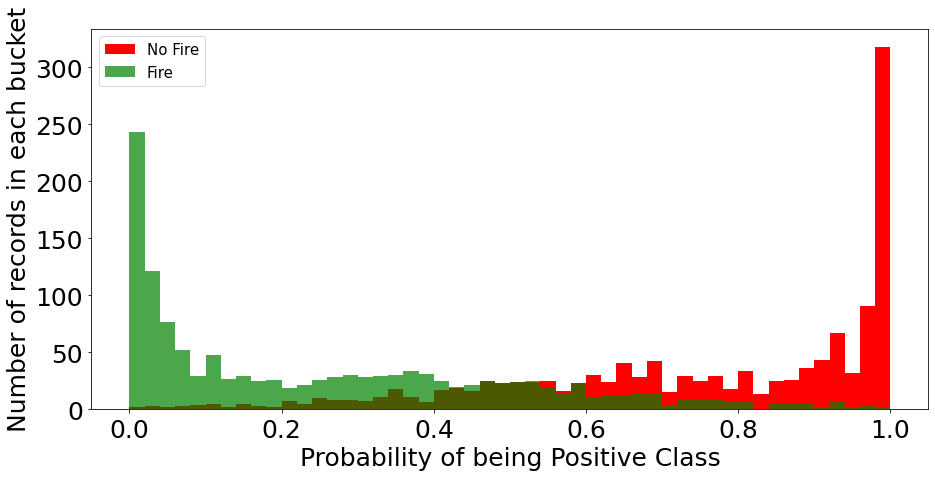

In [25]:
prediction_rf=rf_clf.predict_proba(X_test)
plt.figure(figsize=(15,7))
plt.hist(prediction_rf[:,0], bins=50, label='No Fire',color='r')
plt.hist(prediction_rf[:,1], bins=50, label='Fire', alpha=0.7, color='green')
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [26]:
print('Classification Report:\n',classification_report(y_test, y_rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_rf_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       979
         1.0       0.63      0.43      0.51       321

    accuracy                           0.80      1300
   macro avg       0.73      0.67      0.69      1300
weighted avg       0.78      0.80      0.78      1300

Confusion Matrix:
 [[896  83]
 [182 139]]
